In [1]:
from urllib.request import urlretrieve
import os  # we want python to be able to read what we have in our hard drive

import pandas as pd

class EnergyAnalysis:
    def __init__(self, url, output_file):
        print("here")
        self.url = url
        self.output_file = output_file

    def download_file(self):
        """
        Downloads a file from an URL into your hard drive.
        Parameters
        ------------
        file_link: str
            A string containing the link to the file you wish to download.
        output_file: str
            A string containing the name of the output file. The default value is 'file.csv'
            at the location you are running the function.
        Returns
        ---------
        Nothing
        Example
        ---------
        download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", output_file='student.zip')
        """

        # If file doesn't exist, download it. Else, print a warning message.
        if not os.path.exists(self.output_file):
            urlretrieve(self.url, filename=self.output_file)
        else:
            print("File already exists!")


object = EnergyAnalysis(
    "https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv",
    "energy_data.csv",
)
object.download_file()

here


In [11]:
countries_selected = []
def countries(countries_selected):
    new_string = countries_selected
    return new_string

print(addExclamation('Hello'))


Hello!


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from altair import Chart
import seaborn as sns

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [1]:
from urllib.request import urlretrieve
import os  # we want python to be able to read what we have in our hard drive

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


class EnergyAnalysis:
    """
    Class that controls all class methods and finally
    delivers the requested information.
    It analyses energy data.

    Attributes
    ----------------
    url: str
        The url for the requested file
    output_file: str
        Desired name to the file
    df: pandas.DataFrame
        The padas dataframe with the content of the file downloaded

    Methods
    ----------------
    __init__: Init method
        Class constructor to inizialize the attributes of the class.
    """


    def __init__(self, url: str, output_file: str):
        self.url = url
        self.output_file = output_file
        self.df = None


    #method 1 --> download file and read the csv to df attribute the pandas dataframe.
    def download_file(self):
        """
        Downloads a file from the object.url address into your hard drive and read the dataset into the df attribute which it is a pandas dataframe.

        Parameters
        -----------
        None


        Returns
        ---------
        Nothing


        Example
        ---------
        object.download_file()
        """
        try:
            # If file doesn't exist, download it. Else, print a warning message.
            fullfilename = os.path.join("./downloads/"+self.output_file)
            if not os.path.exists(fullfilename):
                print(urlretrieve(self.url, filename=fullfilename))
            else:
                print("File already exists!")

            self.df = pd.read_csv(fullfilename)
            self.df = self.df[(self.df["year"] >= 1970)]
        except Exception:
            raise Exception("Error 404") from Exception

    # method 2 --> list all the available countries
    def list_countries(self):
        return self.df["country"].unique()

    # method 3 -->
    def show_consumption(self, country, normalize):
        if country in self.df.country.unique():
            aux = self.df[(self.df["country"] == country)]
            # selects the "_consumption" columns
            cols = [col for col in self.df.columns if "_consumption" in col]

            aux = aux.fillna(value=0)

            norm = aux[cols]
            norm
            # normalize the consumptions values to percentages
            norm[cols] = norm[cols].apply(lambda x: (x / x.sum()) * 100, axis=1)
            x = norm
            x["year"] = aux["year"]

            # plot
            plt.style.use("seaborn")
            x.plot.area(x="year")
            plt.show()
        else:
            raise ValueError("Country does not exist.")
    # method 6 -->
    

## 6th Method

 Develop a fifth method that must be called __gapminder__. This is a reference to the famous [gapminder tools](https://www.gapminder.org/tools/chart-type=bubbles&url=v1). 
This method should receive an argument __year__ which must be an __int__. If the received argument is not an int, the method should raise a TypeError. This method should plot a scatter plot where __x__ is __gdp__, __y__ is __total energy consumption__, and the area of each dot is __population__

### 1st Prepare the data before applying the method

In [20]:
#df = pd.read_csv('/Users/josebotelhodesousa/Desktop/NOVA/Mestrado/Cadeiras/2º Semestre/Advanced Programming/Materials/Project/owid-energy-data.csv')
df = pd.read_csv('/Users/josebotelhodesousa/Desktop/NOVA/Mestrado/Cadeiras/2º Semestre/Advanced Programming/Project/owid-energy-data.csv')



In [21]:
countries_used = dataframe["country"].unique()
countries_used

NameError: name 'dataframe' is not defined

In [22]:
#From the Dataset only the columns of the problem were Selected
dataframe = df.filter(regex='year|country|population|consumption|gdp') 

#Delete the rows that are world regions
List = ['Africa','Asia Pacific','CIS','Central America',
       'Eastern Africa','Europe', 'Europe (other)','Middle Africa',
       'Middle East',
       'North America', 'OPEC',
       'Other Asia & Pacific', 'Other CIS', 'Other Caribbean',
       'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa',
       'South & Central America','USSR','Western Africa', 'Western Sahara',
       'World']

dataframe = dataframe[~dataframe['country'].isin(List)]

dataframe['total_consumption']= dataframe[list(dataframe.filter(regex='_consumption'))].sum(axis=1)





### 2nd Apply the Method

In [47]:

def gapminder(y):
    
    fig = plt.figure(figsize=(20, 15))

    year = dataframe[dataframe['year'] == y]
    

    if type(y) != int:
        raise TypeError("Variable 'y' is not int.")
    
    else:
    
        # x-axis values
        x = year['gdp']
        # y-axis values
        y = year['total_consumption']
        p = year['population']
        #size = [2*n for n in range(len(p))]
        size = year['population']
        
        # plotting points as a scatter plot
        plt.scatter(x, y, label= "Population Size",edgecolors = 'black',marker= "o",lw = 1,
                    c=year.population,s=year.population/2**18)

 
        plt.colorbar(label='Total Energy Consumption',shrink=1)
        plt.tick_params(labelsize=20)
    
        # x-axis label
        plt.xlabel('GDP',fontsize = 20)
        # x-axis label
        plt.ylabel('Total Energy Consumption',fontsize = 20)
        # plot title
        plt.title('Countries GDP and Energy Consumption in a given Year',fontsize = 20)
        
        #Editing the Legend
        pws = [500000, 10000000, 100000000, 1000000000]
        for pw in pws:
             plt.scatter([], [], s=pw/2**18, c='k',label=str(pw),cmap = 'viridis')

        h, l = plt.gca().get_legend_handles_labels()
        plt.legend(h[1:], l[1:], labelspacing=1.9, title="Population", borderpad=0.9, 
                    frameon=True ,framealpha=0.6, edgecolor="blue", facecolor="lightblue",fontsize=20,title_fontsize=25)
        
    

       # fig, ax = plt.subplots()
        #ax.scatter(x, y)

        #for i, txt in enumerate(p):
           # ax.annotate(txt, (x[i], y[i]))
        
      
        
        
        #Change the X and Y axis scale for better visualization
        plt.xscale('log')
        plt.yscale('log')
        
        plt.grid()
        
        # function to show the plot
        
        f = plt.show()
    

    
    return f



In [27]:
dataframe

,country,year,biofuel_consumption,coal_consumption,energy_per_gdp,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption,total_consumption
0,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4832414.0,NaN,NaN,NaN,NaN,NaN,0.000
1,Afghanistan,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4879685.0,NaN,NaN,NaN,NaN,NaN,0.000
2,Afghanistan,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4935122.0,NaN,NaN,NaN,NaN,NaN,0.000
3,Afghanistan,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998861.0,NaN,NaN,NaN,NaN,NaN,0.000
4,Afghanistan,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5063419.0,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,Zimbabwe,2015,0.0,NaN,2.223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13814642.0,55.642,NaN,NaN,2.503057e+10,NaN,55.642
17466,Zimbabwe,2016,0.0,NaN,1.889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14030338.0,47.500,NaN,NaN,2.515176e+10,NaN,47.500
17467,Zimbabwe,2017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14236599.0,NaN,NaN,NaN,NaN,NaN,0.000
17468,Zimbabwe,2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14438812.0,NaN,NaN,NaN,NaN,NaN,0.000


KeyError: 0

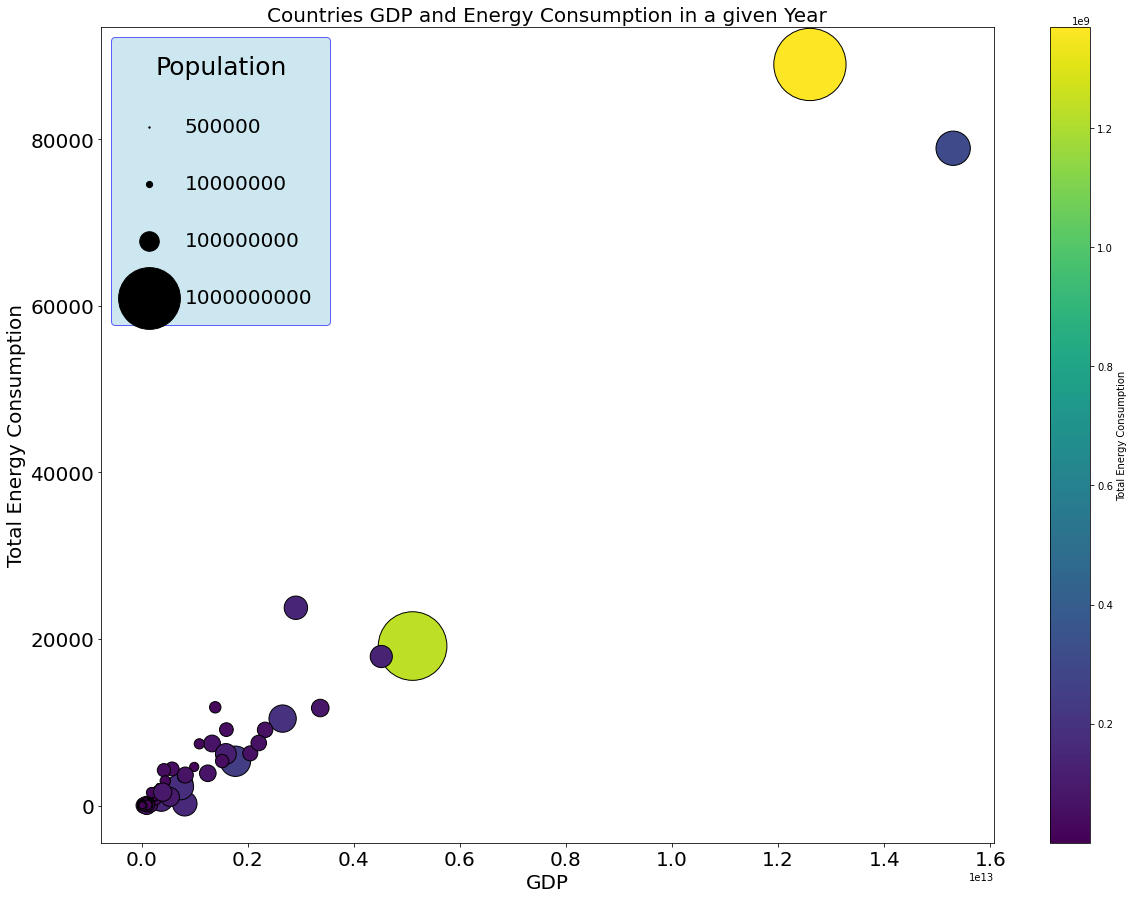

In [49]:
gapminder(2010)

In [34]:
#Testing the Error
gapminder('t')

TypeError: Variable 'y' is not int.

<Figure size 1440x1080 with 0 Axes>

In [2]:
from urllib.request import urlretrieve
import os  # we want python to be able to read what we have in our hard drive

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


class EnergyAnalysis:
    """
    Class that controls all class methods and finally
    delivers the requested information.
    It analyses energy data.

    Attributes
    ----------------
    url: str
        The url for the requested file
    output_file: str
        Desired name to the file
    df: pandas.DataFrame
        The padas dataframe with the content of the file downloaded

    Methods
    ----------------
    __init__: Init method
        Class constructor to inizialize the attributes of the class.

    download_file: Download method
        Download a file base on the url strored in the object of the class,
        and reurns a pandas dataframe with the data
    """


    def __init__(self, url: str, output_file: str):
        """
        Class constructor to inizialize the attributes of the class.

        Parameters
        ----------------
        url: str
            The url for the requested file
        output_file: str
            The name of the output file
        df: pandas dataframe
            The columns included in the correlation matrix
        """

        self.url = url
        self.output_file = output_file
        self.df = None


    #method 1 --> download file and read the csv to df attribute the pandas dataframe.
    def download_file(self):
        """
        Downloads a file from the object.url address into your hard drive and read the dataset into the df attribute which it is a pandas dataframe.

        Parameters
        -----------
        None


        Returns
        ---------
        dataset: pandas dataframe


        Example
        ---------
        object.download_file()
        """
        try:
            # If file doesn't exist, download it. Else, print a warning message.
            fullfilename = os.path.join("./downloads/"+self.output_file)
            if not os.path.exists(fullfilename):
                print(urlretrieve(self.url, filename=fullfilename))
            else:
                print("File already exists!")

            self.df = pd.read_csv(fullfilename)
            self.df = self.df[(self.df["year"] >= 1970)]
        except Exception:
            raise Exception("Error 404") from Exception

    # method 2 --> list all the available countries
    def list_countries(self):
        """
        Returns a list of all available countries in the dataset

        Parameter
        ----------------
        None

        Raises
        -----------------
        None

        Returns
        -----------------
        Array
        """
        region_list = ['Africa','Asia Pacific','CIS','Central America',
       'Eastern Africa','Europe', 'Europe (other)','Middle Africa',
       'Middle East',
       'North America', 'OPEC',
       'Other Asia & Pacific', 'Other CIS', 'Other Caribbean',
       'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa',
       'South & Central America','USSR','Western Africa', 'Western Sahara',
       'World']
        return self.df[(~self.df["country"].isin(region_list))].country.unique()

    # method 3 -->
    def show_consumption(self, country:str , normalize:bool):
        """
        Plots the normalized or not normalized consumptions of the past years of a given country.

        Parameter
        ----------------
        country: str
        Name of the country that we want to analyze the consumption.

        normalize: bool
        Option if we want or not to normalize the consuption data.

        Raises
        -----------------
        ValueError
        If the country is not present on teh dataset

        Returns
        -----------------
        None
        """
        if country in self.list_countries():
            aux = self.df[(self.df["country"] == country)]
            # selects the "_consumption" columns
            cols = [col for col in self.df.columns if "_consumption" in col]

            aux = aux.fillna(value=0)

            norm = aux[cols]
            norm
            # normalize the consumptions values to percentages
            if(normalize):
                norm[cols] = norm[cols].apply(lambda x: (x / x.sum()) * 100, axis=1)
            x = norm
            x["year"] = aux["year"]
            # plot
            plt.style.use("seaborn")
            x.plot.area(x="year")
            plt.show()
        else:
            raise ValueError("Country does not exist.")

     # method 6 -->


    def gapminder(self,y):
        
        """
        Plots a scatter Plot comparing the Gdp of each country and its Total Energy Consumption of a given year.
        The population of each country can also be compared by the size of the data points.
        
        Parameter
        _______________
        
        year: int
        Year that we want to analyse countries' GDP and Total Energy Consumption
        
        
        Raises
        -----------------
        ValueError
        If the input given is not an 'int'

        Returns
        -----------------
        Scatter plot
        
        """
    
    
        #From the Dataset only the columns of the problem were Selected
        dataframe = self.df.filter(regex='year|country|population|consumption|gdp') 

        dataframe['total_consumption']= dataframe[list(dataframe.filter(regex='_consumption'))].sum(axis=1)


        #Define the size of the plot for better visualization
        fig = plt.figure(figsize=(20, 15))

        year = dataframe[dataframe['year'] == y]
    

        if type(y) != int:
            raise TypeError("Variable 'y' is not int.")

        else:

            # x-axis values
            x = year['gdp']
            # y-axis values
            y = year['total_consumption']
            p = year['population']
            #size = [2*n for n in range(len(p))]
            size = year['population']

            # plotting points as a scatter plot
            plt.scatter(x, y, label= "Population Size",edgecolors = 'black',marker= "o",lw = 1,
                        c=year.population,s=year.population/2**18)


            plt.colorbar(label='Total Energy Consumption',shrink=1)
            plt.tick_params(labelsize=20)

            # x-axis label
            plt.xlabel('GDP',fontsize = 20)
            # x-axis label
            plt.ylabel('Total Energy Consumption',fontsize = 20)
            # plot title
            plt.title('Countries GDP and Energy Consumption in a given Year',fontsize = 20)

            #Editing the Legend
            pws = [500000, 10000000, 100000000, 1000000000]
            for pw in pws:
                 plt.scatter([], [], s=pw/2**18, c='k',label=str(pw),cmap = 'viridis')

            h, l = plt.gca().get_legend_handles_labels()
            plt.legend(h[1:], l[1:], labelspacing=1.9, title="Population", borderpad=0.9, 
                        frameon=True ,framealpha=0.6, edgecolor="blue", facecolor="lightblue",fontsize=20,title_fontsize=25)



            #Change the X and Y axis scale for better visualization
            plt.xscale('log')
            plt.yscale('log')

            plt.grid()

            # function to show the plot

            f = plt.show()



        return f



In [7]:
object = EnergyAnalysis("https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv","energy_data.csv")
object.download_file()

File already exists!


## Method 6: Plot a Scatter Plot comparing the Total Energy Consumption, GDP and the Population of each Country

In this method, we asked the user to insert a year on the method we called 'gapminder'. After calling the method, the user would get a scatter plot which indicated the Total Energy Consumption (Y Axis), the GDP (X Axis) of a each country in a given year. The user could also compare the population of each country by the size of data point. 


In [ ]:
object.gapminder(2010)

Furthemore, if the received argument on the method was not an 'integer' , the method would raise a 'TypeError'.

In [8]:
object.gapminder('t')

/var/folders/c6/y6dgbxdd7s9g1lh4d73358780000gn/T/ipykernel_22006/264802636.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['total_consumption']= dataframe[list(dataframe.filter(regex='_consumption'))].sum(axis=1)


TypeError: Variable 'y' is not int.

<Figure size 1440x1080 with 0 Axes>

In [3]:
b = EnergyAnalysis('./downloads/',)


NameError: name 'df' is not defined

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17466,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17467,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17468,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [4]:
object = EnergyAnalysis("https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv","energy_data.csv")
object.download_file()



File already exists!


/var/folders/c6/y6dgbxdd7s9g1lh4d73358780000gn/T/ipykernel_22006/264802636.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['total_consumption']= dataframe[list(dataframe.filter(regex='_consumption'))].sum(axis=1)


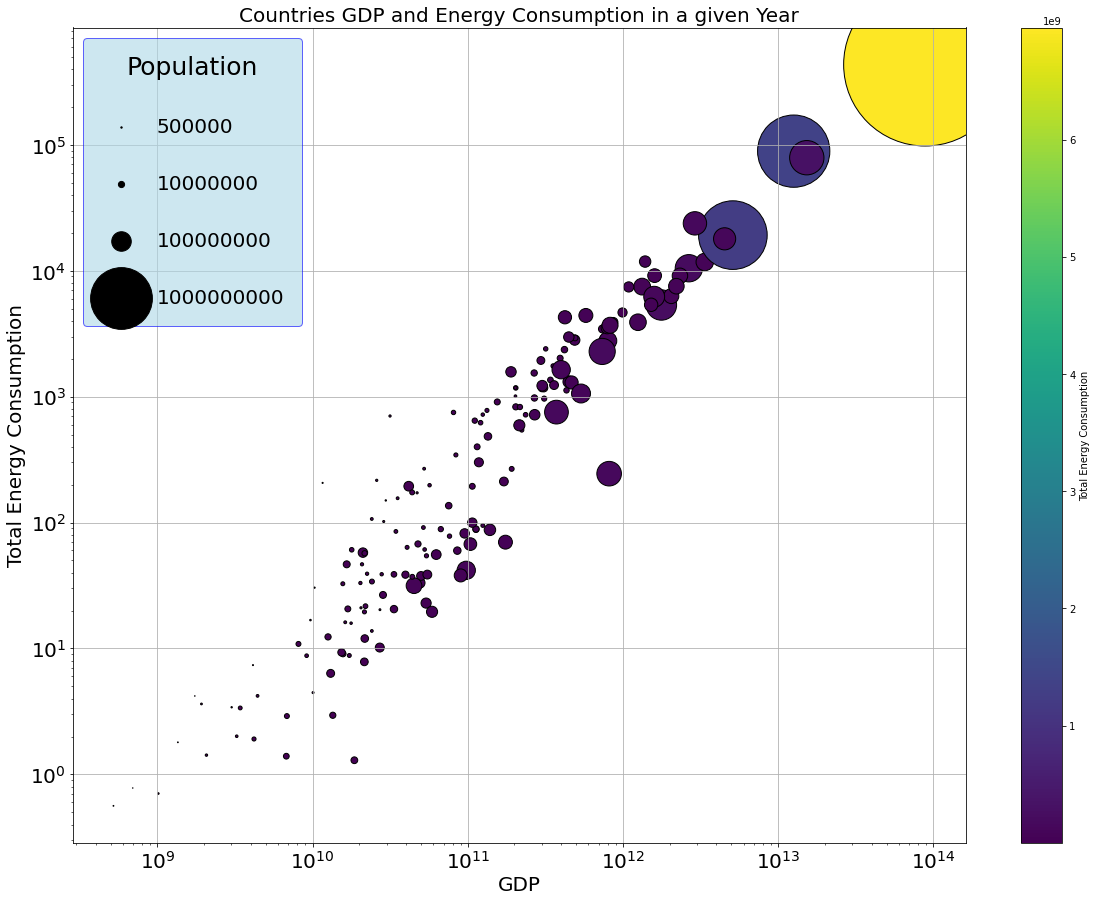

In [5]:
object.gapminder(2010)

In [82]:
self.df

NameError: name 'self' is not defined

In [77]:
b = EnergyAnalysis()

TypeError: EnergyAnalysis.__init__() missing 2 required positional arguments: 'url' and 'output_file'

In [73]:
pd.Dataframe(EnergyAnalysis)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
from bycicle_analysis import BycicleAnalysis

LINK = ("Desktop/NOVA/Mestrado/Cadeiras/2º Semestre/Advanced Programming/Project (Git linked)/Group_17/downloads/energy_data.csv")
FILE_PATH = "../downloads"
HOUR_PATH = "./downloads/hour.csv"
CORR_COLUMNS = ['mnth', 'hum', 'windspeed', 'weathersit', 'temp', 'cnt']
object = BycicleAnalysis(LINK)